In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy.exc import SQLAlchemyError
from config import engine
import warnings
warnings.filterwarnings('ignore')

try:
    with engine.connect() as connection:
        print("Successfully Connected database in READ ONLY mode")

        table_df = pd.read_sql("SHOW TABLES;", con=connection)

        if not table_df.empty:
            print(f"Total Tables Found : {len(table_df)}")
            print("Sample Tables :")
            print(table_df)
        else:
            print("No tables found in the database")

except SQLAlchemyError as e:
    print("Database connection failed")
    print(f"Error happen: {str(e)}")

except Exception as exc:
    print("Something went wrong")
    print(f"Details: {str(exc)}")

Connected in READ-ONLY mode!
Successfully Connected database in READ ONLY mode
Total Tables Found : 9
Sample Tables :
  Tables_in_ecommerce_db
0             categories
1              customers
2          inventory_log
3    marketing_campaigns
4            order_items
5                 orders
6               payments
7               products
8                reviews


In [2]:
tables_df = pd.read_sql("SHOW TABLES", engine)
tables = tables_df.iloc[:,0].tolist()

for table in tables:
    print(f"Table Name: {table}")
    dataframe = pd.read_sql(f"SELECT * FROM {table}", con=engine)
    print(dataframe.columns)
    print('-'*60 + '\n')

Table Name: categories
Index(['category_id', 'category_name', 'description'], dtype='object')
------------------------------------------------------------

Table Name: customers
Index(['customer_id', 'first_name', 'last_name', 'email', 'phone', 'gender',
       'age', 'city', 'state', 'country', 'signup_date', 'customer_segment'],
      dtype='object')
------------------------------------------------------------

Table Name: inventory_log
Index(['log_id', 'product_id', 'change_type', 'quantity_change',
       'change_date'],
      dtype='object')
------------------------------------------------------------

Table Name: marketing_campaigns
Index(['campaign_id', 'campaign_name', 'start_date', 'end_date', 'channel',
       'total_spent', 'revenue_generated'],
      dtype='object')
------------------------------------------------------------

Table Name: order_items
Index(['order_item_id', 'order_id', 'product_id', 'quantity', 'unit_price',
       'discount', 'total_price'],
      dtype='o

#### To find datatype for columns

In [3]:
table_df = pd.read_sql("SHOW TABLES", engine)
table_list = table_df.iloc[:,0].tolist()

for table in table_list:
    print(f"Table Name: {table}")
    column_dtype = pd.read_sql(f"SELECT * FROM {table}", engine)
    print(column_dtype.dtypes)
    print('-'*30, '\n')

Table Name: categories
category_id       int64
category_name    object
description      object
dtype: object
------------------------------ 

Table Name: customers
customer_id          int64
first_name          object
last_name           object
email               object
phone               object
gender              object
age                  int64
city                object
state               object
country             object
signup_date         object
customer_segment    object
dtype: object
------------------------------ 

Table Name: inventory_log
log_id                      int64
product_id                  int64
change_type                object
quantity_change             int64
change_date        datetime64[ns]
dtype: object
------------------------------ 

Table Name: marketing_campaigns
campaign_id            int64
campaign_name         object
start_date            object
end_date              object
channel               object
total_spent          float64
revenue_generate

In [5]:
# Columns that must be converted to datetime

Change_Dtypes = {
    "customers": ["signup_date"],
    "marketing_campaigns": ["start_date", "end_date"],
    "products": ["added_date"],
    "reviews": ["review_date"],
    "inventory_log": ["change_date"],
    "orders": ["order_date"],
    "payments": ["payment_date"]
}

cleaned_data = {}

try:
    table_df = pd.read_sql("SHOW TABLES", engine)
    table_list = table_df.iloc[:, 0].tolist()

    for table in table_list:
        
        df = pd.read_sql(f"SELECT * FROM `{table}`", engine)

        if table in Change_Dtypes:
            print(f"\nFixing datatypes in table: {table}")
            changed_columns = []
            for col in Change_Dtypes[table]:
                if col in df.columns:
                    df[col] = pd.to_datetime(df[col], errors='coerce')
                    changed_columns.append(col)
            print("Columns changed to datetime:", changed_columns)

        cleaned_data[table] = df

    print("\n Datatype conversion completed!")

except Exception as exp:
    print("Unexpected error:", str(exp))


Fixing datatypes in table: customers
Columns changed to datetime: ['signup_date']

Fixing datatypes in table: inventory_log
Columns changed to datetime: ['change_date']

Fixing datatypes in table: marketing_campaigns
Columns changed to datetime: ['start_date', 'end_date']

Fixing datatypes in table: orders
Columns changed to datetime: ['order_date']

Fixing datatypes in table: payments
Columns changed to datetime: ['payment_date']

Fixing datatypes in table: products
Columns changed to datetime: ['added_date']

Fixing datatypes in table: reviews
Columns changed to datetime: ['review_date']

 Datatype conversion completed!


In [6]:
# Count the data

for table in tables:
    print(f"Table Name: {table}")
    data_count = pd.read_sql(f"SELECT COUNT(*) as data_count FROM {table}", engine)['data_count'].values[0]
    print("Count of records:", data_count)
    print('-'*40)

Table Name: categories
Count of records: 15
----------------------------------------
Table Name: customers
Count of records: 1000
----------------------------------------
Table Name: inventory_log
Count of records: 3000
----------------------------------------
Table Name: marketing_campaigns
Count of records: 50
----------------------------------------
Table Name: order_items
Count of records: 4500
----------------------------------------
Table Name: orders
Count of records: 1500
----------------------------------------
Table Name: payments
Count of records: 1500
----------------------------------------
Table Name: products
Count of records: 500
----------------------------------------
Table Name: reviews
Count of records: 2000
----------------------------------------


In [7]:
# Statistical summary for numeric columns

for table in tables:
    print(f"Table Name: {table}")
    data_count = pd.read_sql(f"SELECT * FROM {table}", engine)
    print(data_count.describe())
    print('-'*40)

Table Name: categories
       category_id
count    15.000000
mean      8.000000
std       4.472136
min       1.000000
25%       4.500000
50%       8.000000
75%      11.500000
max      15.000000
----------------------------------------
Table Name: customers
       customer_id          age
count  1000.000000  1000.000000
mean    500.500000    46.566000
std     288.819436    16.719306
min       1.000000    18.000000
25%     250.750000    32.000000
50%     500.500000    46.000000
75%     750.250000    61.000000
max    1000.000000    75.000000
----------------------------------------
Table Name: inventory_log
            log_id   product_id  quantity_change  \
count  3000.000000  3000.000000      3000.000000   
mean   1500.500000   247.407667        35.215333   
min       1.000000     1.000000       -10.000000   
25%     750.750000   121.000000        -7.000000   
50%    1500.500000   249.000000        -3.000000   
75%    2250.250000   371.250000        71.000000   
max    3000.000000   500

### Revenue & Sales Trends

In [8]:
# Monthly revenue trend

query = '''
SELECT 
    DATE_FORMAT(order_date, '%Y-%m') AS month,
    SUM(total_amount) AS total_revenue,
    COUNT(order_id) AS total_orders,
    ROUND(AVG(total_amount),2) AS avg_order_value
FROM orders
GROUP BY DATE_FORMAT(order_date, '%Y-%m')
ORDER BY DATE_FORMAT(order_date, '%Y-%m');
'''

monthly_trend = pd.read_sql(query, engine)
print(monthly_trend)

      month  total_revenue  total_orders  avg_order_value
0   2023-11      202280.53            49          4128.17
1   2023-12      280948.93            70          4013.56
2   2024-01      243357.42            55          4424.68
3   2024-02      211796.76            55          3850.85
4   2024-03      265413.98            62          4280.87
5   2024-04      272361.64            68          4005.32
6   2024-05      228315.54            60          3805.26
7   2024-06      256397.45            64          4006.21
8   2024-07      193335.73            46          4202.95
9   2024-08      193689.50            52          3724.80
10  2024-09      331890.68            79          4201.15
11  2024-10      178043.20            49          3633.53
12  2024-11      263584.75            58          4544.56
13  2024-12      258731.40            66          3920.17
14  2025-01      291620.24            76          3837.11
15  2025-02      221728.47            63          3519.50
16  2025-03   

   quarter  total_revenue  total_orders  avg_order_value
0  2023-Q4      483229.46           119          4060.75
1  2024-Q1      720568.16           172          4189.35
2  2024-Q2      757074.63           192          3943.10
3  2024-Q3      718915.91           177          4061.67
4  2024-Q4      700359.35           173          4048.32
5  2025-Q1      746671.70           208          3589.77
6  2025-Q2      717958.09           184          3901.95
7  2025-Q3      787997.65           202          3900.98
8  2025-Q4      291902.94            73          3998.67




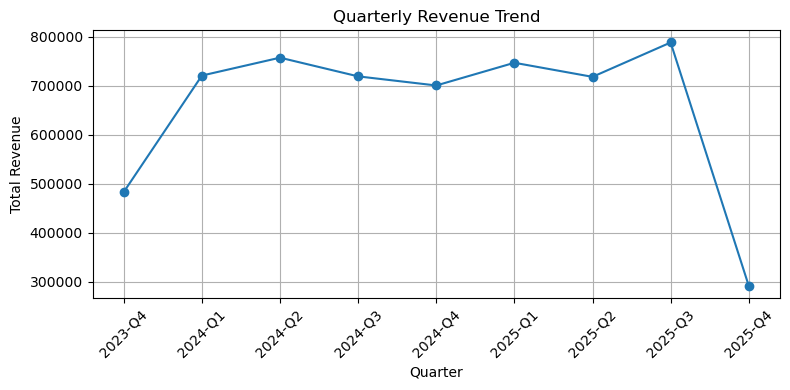

In [10]:
# Quarterly revenue trend

query = '''
SELECT 
    CONCAT(YEAR(order_date), '-Q', QUARTER(order_date)) AS quarter,
    SUM(total_amount) AS total_revenue,
    COUNT(order_id) AS total_orders,
    ROUND(AVG(total_amount),2) AS avg_order_value
FROM orders
GROUP BY YEAR(order_date), QUARTER(order_date)
ORDER BY YEAR(order_date), QUARTER(order_date);
'''

quarterly_trend = pd.read_sql(query, engine)
print(quarterly_trend)
print('\n')

# Quarterly revenue plot
plt.figure(figsize=(8,4))
plt.plot(quarterly_trend['quarter'], quarterly_trend['total_revenue'], marker='o')
plt.title("Quarterly Revenue Trend")
plt.xlabel("Quarter")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Revenue spikes in Q3 2025 (July–September)

This period shows the highest quarterly revenue, driven by increased demand in Electronics and Clothing.
Action: Increase marketing spend & inventory for these categories during Q3.

In [11]:
# Top 10 Revenue generated products

query = '''
SELECT
    p.product_name,
    COUNT(DISTINCT o.order_id) AS total_orders,
    SUM(oi.total_price) AS total_revenue,
    SUM(oi.quantity) AS total_quantity_sold,
    ROUND(AVG(oi.total_price), 2) AS avg_item_revenue
FROM products p
JOIN order_items oi ON p.product_id = oi.product_id
JOIN orders o ON oi.order_id = o.order_id
GROUP BY p.product_id, p.product_name
ORDER BY total_revenue DESC
LIMIT 10;
'''

total_revenue = pd.read_sql(query, engine)
print(total_revenue)

              product_name  total_orders  total_revenue  total_quantity_sold  \
0      Western Harum Elite            14      108657.33                 60.0   
1   Quia Consequuntur Mini            11      108091.46                 51.0   
2     Repellat Impedit Pro            13      106765.42                 54.0   
3        Quidem Recent Pro            17      106635.65                 58.0   
4        Optio Molestias X            14      103535.29                 57.0   
5       Direction Create X            12      100401.42                 54.0   
6  Dolores Education Elite            17       96539.28                 59.0   
7            Maxime They X            22       95090.75                 73.0   
8      Doloribus Rem Elite            11       93807.66                 46.0   
9         Before Dolorem X            14       91962.84                 49.0   

   avg_item_revenue  
0           7761.24  
1           9826.50  
2           8212.72  
3           6272.69  
4        

In [12]:
# Revenue generated by categories

query = '''
SELECT
    c.category_name,
    COUNT(DISTINCT o.order_id) AS total_orders,
    SUM(oi.total_price) AS total_revenue,
    ROUND(AVG(oi.total_price), 2) AS avg_item_revenue
FROM categories c
JOIN products p ON c.category_id = p.category_id
JOIN order_items oi ON oi.product_id = p.product_id
JOIN orders o ON oi.order_id = o.order_id
GROUP BY c.category_name
ORDER BY total_revenue DESC;
'''

top_categories = pd.read_sql(query, engine)
print(top_categories)

             category_name  total_orders  total_revenue  avg_item_revenue
0              Electronics           382     2338558.53           5413.33
1                 Clothing           327     1920356.35           5246.88
2                    Books           329     1821208.02           4869.54
3                  Grocery           295     1817598.14           5474.69
4             Toys & Games           309     1749993.07           4999.98
5                Furniture           323     1679290.33           4703.89
6               Automotive           273     1567102.82           5241.15
7               Stationery           249     1544635.29           5616.86
8   Beauty & Personal Care           281     1528797.83           5062.24
9        Health & Wellness           248     1402401.41           5252.44
10        Sports & Fitness           263     1395368.94           4861.91
11   Jewelry & Accessories           242     1334278.28           5073.30
12         Home Appliances           2

In [13]:
# revenue by brand

query = '''
SELECT
    p.brand,
    COUNT(DISTINCT o.order_id) AS total_orders,
    SUM(oi.total_price) AS total_revenue,
    ROUND(AVG(oi.total_price),2) AS avg_order_value
FROM products p
JOIN order_items oi ON p.product_id = oi.product_id
JOIN orders o ON oi.order_id = o.order_id
GROUP BY p.brand;
'''

revenue_by_brand = pd.read_sql(query, engine)
print(revenue_by_brand)

                            brand  total_orders  total_revenue  \
0                     Allen-Kelly            16       88784.26   
1          Amble, Bobal and Golla            48      282897.59   
2                       Arora PLC            29      156786.86   
3    Atkinson, Hayden and Johnson            41      203328.88   
4             Avery, Smith and Li             9       42503.26   
..                            ...           ...            ...   
178         Wyatt, Mann and James            18       89632.13   
179             Yohannan and Sons            22       95055.73   
180                Yohannan Group             7       52703.08   
181         Young, Cook and Smith            61      287901.06   
182                  Zuniga-Patel            10       55477.11   

     avg_order_value  
0            5549.02  
1            5893.70  
2            5406.44  
3            4959.24  
4            4722.58  
..               ...  
178          4717.48  
179          4320.72  


In [14]:
# Top 10 products by quantity sold

query = '''
SELECT
    p.product_name,
    SUM(oi.quantity) AS total_sold,
    SUM(oi.quantity * oi.unit_price) AS total_revenue
FROM products p
JOIN order_items oi ON p.product_id = oi.product_id
GROUP BY p.product_name
ORDER BY total_sold DESC
LIMIT 10;
'''

top_sold_products = pd.read_sql(query,engine)
print(top_sold_products)

                    product_name  total_sold  total_revenue
0                  Maxime They X        73.0       98165.31
1                 Summer Her Pro        67.0       88714.04
2  Explicabo Exercitationem Mini        66.0       62265.41
3               Iusto Indicate X        60.0       84251.78
4            Western Harum Elite        60.0      111326.88
5   Repudiandae Repudiandae Plus        59.0       70507.87
6        Dolores Education Elite        59.0       99143.58
7              Quidem Recent Pro        58.0      109400.53
8           Quis Praesentium Max        58.0       78512.50
9                  Illum Up Plus        57.0       64638.65


In [15]:
# Number of customers per segment

query = '''
SELECT
    customer_segment,
    COUNT(customer_id) AS total_customers
FROM customers
GROUP BY customer_segment
ORDER BY customer_segment
'''

customers_per_segment = pd.read_sql(query, engine)
print(customers_per_segment)

  customer_segment  total_customers
0              New              218
1          Premium              148
2          Regular              571
3              VIP               63


### Regular segment dominates (57% of customers)

Most customers belong to the “Regular” segment, showing consistent repeat purchases.
Action: Introduce a structured loyalty program to encourage these Regular customers to move into the Premium tier, increasing long-term value and retention.

In [16]:
# Frequently ordered customers

query = '''
SELECT
    CONCAT(first_name, ' ' ,last_name) AS full_name,
    COUNT(o.order_id) AS total_orders,
    SUM(o.total_amount) AS total_amount
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
GROUP BY c.customer_id, full_name
HAVING COUNT(o.order_id) > 1
ORDER BY total_orders DESC
'''

frequent_customers = pd.read_sql(query, engine)
print(frequent_customers)

           full_name  total_orders  total_amount
0         Mr Doherty             7      30149.10
1        Aaina Saraf             6      21050.87
2           Tara Raj             6      25857.81
3       Gillian Shaw             6      27469.66
4    Katherine Black             6      13281.17
..               ...           ...           ...
442     Ishita Chana             2      10182.15
443    Jason Hodgson             2       1797.82
444      Abram Baral             2       9342.67
445         Mr Jones             2       6929.68
446   Dominique Kane             2      10772.25

[447 rows x 3 columns]


In [17]:
# ROI for each marketing campaign

query = '''
SELECT
    channel,
    SUM(total_spent) AS total_spent,
    SUM(revenue_generated) AS total_revenue,
    ROUND(((SUM(revenue_generated) - SUM(total_spent)) / SUM(total_spent)) * 100, 2)
        AS ROI_percentage,
    CONCAT(ROUND(((SUM(revenue_generated) - SUM(total_spent)) / SUM(total_spent)) * 100, 2), '%')
        AS ROI_label
FROM marketing_campaigns
GROUP BY channel
ORDER BY ROI_percentage DESC;
'''

roi_marketing_campaign = pd.read_sql(query, engine)
print(roi_marketing_campaign)

        channel  total_spent  total_revenue  ROI_percentage ROI_label
0         Email   2936002.51    10117619.51          244.61   244.61%
1    Google Ads   2589749.59     7046707.69          172.10   172.10%
2    Influencer   1521659.90     3787691.81          148.92   148.92%
3     Affiliate   1417817.73     2939163.45          107.30   107.30%
4         Other   1535708.73     3124625.37          103.46   103.46%
5  Social Media   2320271.92     4521781.17           94.88    94.88%


### Email marketing produces the highest ROI (244%)
Despite relatively moderate spending, email marketing delivers the highest return, making it the most effective channel.
Action: Expand the email subscriber base and introduce segmented, personalized campaigns to maximize conversions.

### Google Ads & Influencer campaigns also strong (ROI > 145%)
These channels offer a strong balance of high reach and solid profitability.
Action: Maintain or slightly increase the budget to capitalize on their consistent performance.

### Social Media has lowest ROI (~95%)
Social media campaigns remain profitable, but their efficiency is noticeably lower compared to other channels.
Action: Improve audience targeting or reduce ad spend by 10–15% to optimize ROI.


In [18]:
# How would you calculate revenue generated vs spend per campaign channel?

query = '''
SELECT
    channel,
    SUM(total_spent) AS total_spent,
    SUM(revenue_generated) AS revenue_generated,
    (SUM(revenue_generated) - SUM(total_spent)) AS profit_or_loss,
    CASE
        WHEN (SUM(revenue_generated) - SUM(total_spent)) > 0 THEN 'Profit'
        WHEN (SUM(revenue_generated) - SUM(total_spent)) = 0 THEN 'Break Even'
        ELSE 'Loss'
    END AS status,
    CONCAT( ROUND(((SUM(revenue_generated) - SUM(total_spent)) / SUM(total_spent)) * 100, 2), '%') AS ROI
FROM marketing_campaigns
GROUP BY channel
ORDER BY ROI DESC;
'''

campaign_channel = pd.read_sql(query, engine)
print(campaign_channel)

        channel  total_spent  revenue_generated  profit_or_loss  status  \
0  Social Media   2320271.92         4521781.17      2201509.25  Profit   
1         Email   2936002.51        10117619.51      7181617.00  Profit   
2    Google Ads   2589749.59         7046707.69      4456958.10  Profit   
3    Influencer   1521659.90         3787691.81      2266031.91  Profit   
4     Affiliate   1417817.73         2939163.45      1521345.72  Profit   
5         Other   1535708.73         3124625.37      1588916.64  Profit   

       ROI  
0   94.88%  
1  244.61%  
2  172.10%  
3  148.92%  
4  107.30%  
5  103.46%  


In [19]:
# Count of completed vs pending orders

query = '''
SELECT
    CASE
        WHEN status = "Delivered" THEN 'Completed'
        WHEN status = "Pending" THEN 'Pending'
        ELSE 'Other'
    END AS order_status,
    COUNT(order_id) AS total_orders
FROM orders
GROUP BY order_status
ORDER BY total_orders DESC
'''

order_status = pd.read_sql(query, engine)
print(order_status)

  order_status  total_orders
0        Other           912
1    Completed           299
2      Pending           289


### Completed orders (299) closely match Pending (289)

High pending orders signal operational delays.
Action: Improve warehouse processing or vendor supply chain.

In [20]:
# Distribution of Payment Methods

query = '''
SELECT
    payment_method,
    COUNT(*) AS distribution,
    CONCAT(ROUND((COUNT(*) / total_over.total_count) * 100, 2), '%') AS percentage
FROM payments
JOIN (SELECT COUNT(*) AS total_count FROM payments) AS total_over
GROUP BY payment_method
ORDER BY distribution DESC;
'''

payment_methods = pd.read_sql(query, engine)
print(payment_methods)

  payment_method  distribution percentage
0    Net Banking           291     19.40%
1            UPI           268     17.87%
2            COD           252     16.80%
3    Credit Card           247     16.47%
4         PayPal           230     15.33%
5     Debit Card           212     14.13%


### Digital Payment Preference Insight
Net Banking and UPI make up a significant share of total transactions, indicating a clear customer preference for fast and secure digital payments.
Action: Offer small instant cashback or discounts on UPI payments to further drive conversions and encourage higher adoption.

### PayPal Usage Insight
PayPal accounts for the lowest share of payments (around 15%), suggesting limited usage among domestic customers.
Action: Consider disabling PayPal for low-value orders to reduce processing costs, or position it primarily for international customers where PayPal adoption is higher.  

In [23]:
# Track stock movement from the inventory_log

query = '''
SELECT
    product_id,
    change_type,
    quantity_change,
    DATE(change_date) AS change_date,
    SUM(quantity_change)
        OVER( PARTITION BY product_id ORDER BY change_date ASC
        ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
    ) AS cumulative_stock
FROM inventory_log
ORDER BY product_id, change_date;
'''

stock_movement = pd.read_sql(query, engine)
print(stock_movement)

      product_id change_type  quantity_change change_date  cumulative_stock
0              1        Sale               -4  2023-11-15              -4.0
1              1     Restock              177  2024-02-04             173.0
2              1        Sale               -7  2024-05-11             166.0
3              1     Restock               81  2024-05-31             247.0
4              1        Sale               -9  2024-09-07             238.0
...          ...         ...              ...         ...               ...
2995         500        Sale               -1  2024-04-14             187.0
2996         500        Sale               -8  2024-06-20             179.0
2997         500        Sale               -6  2024-10-02             173.0
2998         500        Sale               -9  2024-10-30             164.0
2999         500      Return                8  2025-08-21             172.0

[3000 rows x 5 columns]


In [24]:
# cummulative revenue month-by-month

query = '''
SELECT
    month,
    monthly_revenue,
    SUM(monthly_revenue) OVER(ORDER BY month) AS cumulative_revenue
FROM (
    SELECT
        DATE_FORMAT(order_date, '%Y-%m') AS month,
        SUM(total_amount) AS monthly_revenue
    FROM orders
    GROUP BY month
) AS subquery
ORDER BY month
'''

cummulative_revenue = pd.read_sql(query, engine)
print(cummulative_revenue)

      month  monthly_revenue  cumulative_revenue
0   2023-11        202280.53           202280.53
1   2023-12        280948.93           483229.46
2   2024-01        243357.42           726586.88
3   2024-02        211796.76           938383.64
4   2024-03        265413.98          1203797.62
5   2024-04        272361.64          1476159.26
6   2024-05        228315.54          1704474.80
7   2024-06        256397.45          1960872.25
8   2024-07        193335.73          2154207.98
9   2024-08        193689.50          2347897.48
10  2024-09        331890.68          2679788.16
11  2024-10        178043.20          2857831.36
12  2024-11        263584.75          3121416.11
13  2024-12        258731.40          3380147.51
14  2025-01        291620.24          3671767.75
15  2025-02        221728.47          3893496.22
16  2025-03        233322.99          4126819.21
17  2025-04        295335.20          4422154.41
18  2025-05        224931.22          4647085.63
19  2025-06        1

In [25]:
# Moving average of AOV for the last 3 months.

query = '''
SELECT
    month,
    avg_value,
    ROUND(AVG(avg_value) OVER(ORDER BY month ROWS BETWEEN 2 PRECEDING AND CURRENT ROW), 2) AS aov_cummulative
FROM (
    SELECT
        DATE_FORMAT(order_date, '%y-%m') AS month,
        ROUND(AVG(total_amount), 2) AS avg_value
    FROM orders
    GROUP BY month
) AS subquery
ORDER BY month
'''

cummulative_aov = pd.read_sql(query, engine)
print(cummulative_aov)

    month  avg_value  aov_cummulative
0   23-11    4128.17          4128.17
1   23-12    4013.56          4070.87
2   24-01    4424.68          4188.80
3   24-02    3850.85          4096.36
4   24-03    4280.87          4185.47
5   24-04    4005.32          4045.68
6   24-05    3805.26          4030.48
7   24-06    4006.21          3938.93
8   24-07    4202.95          4004.81
9   24-08    3724.80          3977.99
10  24-09    4201.15          4042.97
11  24-10    3633.53          3853.16
12  24-11    4544.56          4126.41
13  24-12    3920.17          4032.75
14  25-01    3837.11          4100.61
15  25-02    3519.50          3758.93
16  25-03    3381.49          3579.37
17  25-04    4045.69          3648.89
18  25-05    3812.39          3746.52
19  25-06    3801.76          3886.61
20  25-07    3741.87          3785.34
21  25-08    3769.27          3770.97
22  25-09    4193.76          3901.63
23  25-10    3925.79          3962.94
24  25-11    4685.83          4268.46
